Importing the Dependencies

In [209]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score

Data Collection and Processing

In [165]:
# loading the dataset to pandas DataFrame
loan_dataset = pd.read_csv('/content/dataset.csv')

In [166]:
type(loan_dataset)

pandas.core.frame.DataFrame

In [167]:
# printing the first 5 rows of the dataframe
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [168]:
# number of rows and columns
loan_dataset.shape

(614, 13)

In [169]:
# statistical measures
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [170]:
# number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [171]:
# replace missing values of numerical terms with its mean value 
loan_dataset['LoanAmount'] = loan_dataset['LoanAmount'].fillna(loan_dataset['LoanAmount'].mean())
loan_dataset['Loan_Amount_Term'] = loan_dataset['Loan_Amount_Term'].fillna(loan_dataset['Loan_Amount_Term'].mean())
loan_dataset['Credit_History'] = loan_dataset['Credit_History'].fillna(loan_dataset['Credit_History'].mean())

In [172]:
# replace missing values of categorical terms with its mode value 
loan_dataset['Gender'] = loan_dataset["Gender"].fillna(loan_dataset['Gender'].mode()[0])
loan_dataset['Married'] = loan_dataset["Married"].fillna(loan_dataset['Married'].mode()[0])
loan_dataset['Dependents'] = loan_dataset["Dependents"].fillna(loan_dataset['Dependents'].mode()[0])
loan_dataset['Self_Employed'] = loan_dataset["Self_Employed"].fillna(loan_dataset['Self_Employed'].mode()[0])

In [173]:
# number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [174]:
# label encoding
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [175]:
# printing the first 5 rows of the dataframe
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1


In [176]:
# Dependent column values
loan_dataset['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [177]:
# replacing the value of 3+ to 4
loan_dataset = loan_dataset.replace(to_replace='3+', value=4)

In [178]:
# dependent values
loan_dataset['Dependents'].value_counts()

0    360
1    102
2    101
4     51
Name: Dependents, dtype: int64

Data Visualization

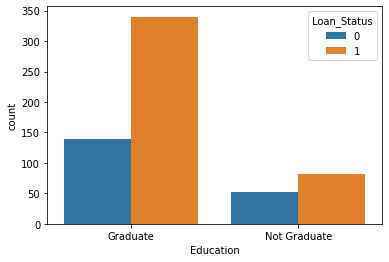

In [179]:
# education & Loan Status
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)

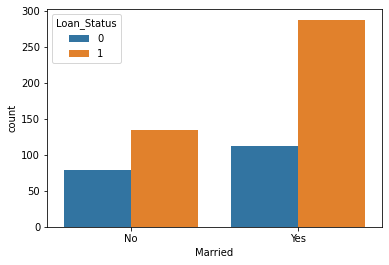

In [180]:
# marital status & Loan Status
sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset)

In [181]:
# convert categorical columns to numerical values
loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [182]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


In [183]:
# separating the data and label
X = loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = loan_dataset['Loan_Status']

In [184]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0          0          1              0             5849   
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

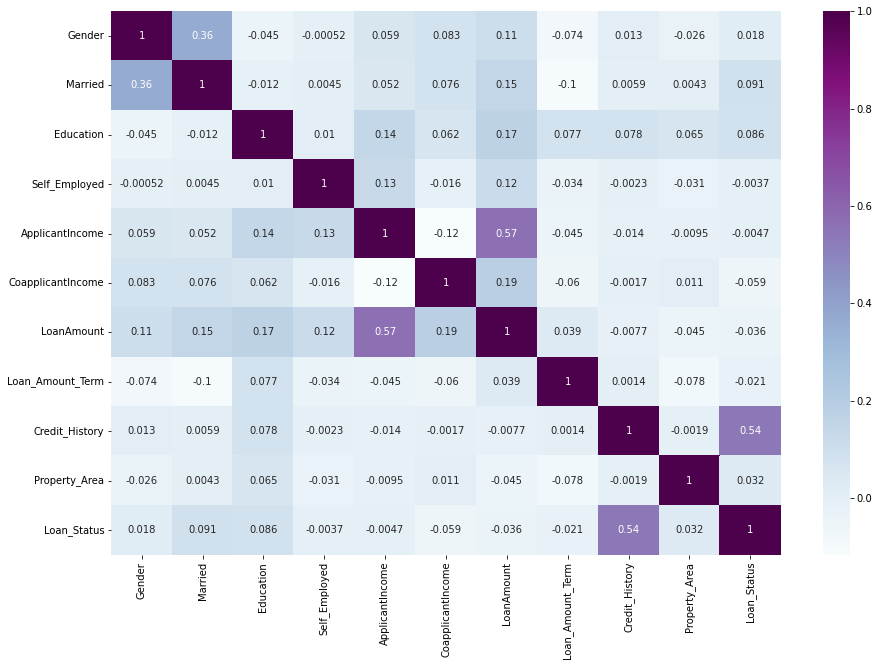

In [210]:
corr = loan_dataset.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="BuPu")

In [185]:
scaler = StandardScaler()

In [186]:
scaler.fit(X)

StandardScaler()

In [187]:
standardized_data = scaler.transform(X)

In [188]:
print(standardized_data)

[[ 0.47234264 -1.37208932 -0.6827291  ...  0.27985054  0.45164045
   1.22329839]
 [ 0.47234264  0.72881553  0.14245922 ...  0.27985054  0.45164045
  -1.31851281]
 [ 0.47234264  0.72881553 -0.6827291  ...  0.27985054  0.45164045
   1.22329839]
 ...
 [ 0.47234264  0.72881553  0.14245922 ...  0.27985054  0.45164045
   1.22329839]
 [ 0.47234264  0.72881553  0.96764754 ...  0.27985054  0.45164045
   1.22329839]
 [-2.11710719 -1.37208932 -0.6827291  ...  0.27985054 -2.41044061
  -0.04760721]]


In [189]:
X = standardized_data
Y = loan_dataset['Loan_Status']

In [190]:
print(X)
print(Y)

[[ 0.47234264 -1.37208932 -0.6827291  ...  0.27985054  0.45164045
   1.22329839]
 [ 0.47234264  0.72881553  0.14245922 ...  0.27985054  0.45164045
  -1.31851281]
 [ 0.47234264  0.72881553 -0.6827291  ...  0.27985054  0.45164045
   1.22329839]
 ...
 [ 0.47234264  0.72881553  0.14245922 ...  0.27985054  0.45164045
   1.22329839]
 [ 0.47234264  0.72881553  0.96764754 ...  0.27985054  0.45164045
   1.22329839]
 [-2.11710719 -1.37208932 -0.6827291  ...  0.27985054 -2.41044061
  -0.04760721]]
0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64


Train Test Split

In [191]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [192]:
print(X.shape, X_train.shape, X_test.shape)

(614, 11) (552, 11) (62, 11)


Training the model:

Support Vector Machine Model

In [193]:
model = LogisticRegression()

In [194]:
#training the support Vector Macine model
model.fit(X_train,Y_train)

LogisticRegression()

Model Evaluation

In [195]:
# accuracy score on training data
X_train_prediction = model.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)

In [196]:
print('Accuracy on training data : ', training_data_accuray)

Accuracy on training data :  0.8115942028985508


In [197]:
# accuracy score on training data
X_test_prediction = model.predict(X_test)
test_data_accuray = accuracy_score(X_test_prediction,Y_test)

In [198]:
print('Accuracy on test data : ', test_data_accuray)

Accuracy on test data :  0.7903225806451613


Making a predictive system

In [214]:
loan_dataset.drop(columns=['Loan_ID'],axis=1)
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


In [215]:
#input_data = (1, 1, 4, 1, 0, 3036, 2504.0, 158.0, 360.0, 0.0, 1)               #input for not accepted in pred and 0.0 in credit_history zero in loan_status)
#input_data = (1, 1, 1, 1, 0, 12841, 10968.0, 349.000000, 360.0, 1.000000, 1)   #input for accepted in pred and 1.0 in credit_history zero in loan_status)
#input_data = (1, 0, 0, 1, 0, 1853, 2840.0, 114.000000, 360.0, 1.000000, 0)     #input for accepted in pred and 1.0 in credit_history one in loan_status)
#input_data = (1, 0, 1, 0, 0, 3596, 0.0, 100.000000, 240.0, 0.842199, 2)        #input for accepted in pred and 0.842199 in credit_history one in loan_status)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = model.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print("Loan isn't accepted")
else:
  print('Loan Accepted')

[[ 0.47234264  0.72881553  2.61802418  0.52836225 -0.39260074 -0.38784963
   0.30191352  0.13800137  0.27985054 -2.41044061 -0.04760721]]
[0]
Loan isn't accepted


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


# **results confirmed that the main affect in loan_status is credit_history and we particulary focused on that in the predictive system in 4 cases**